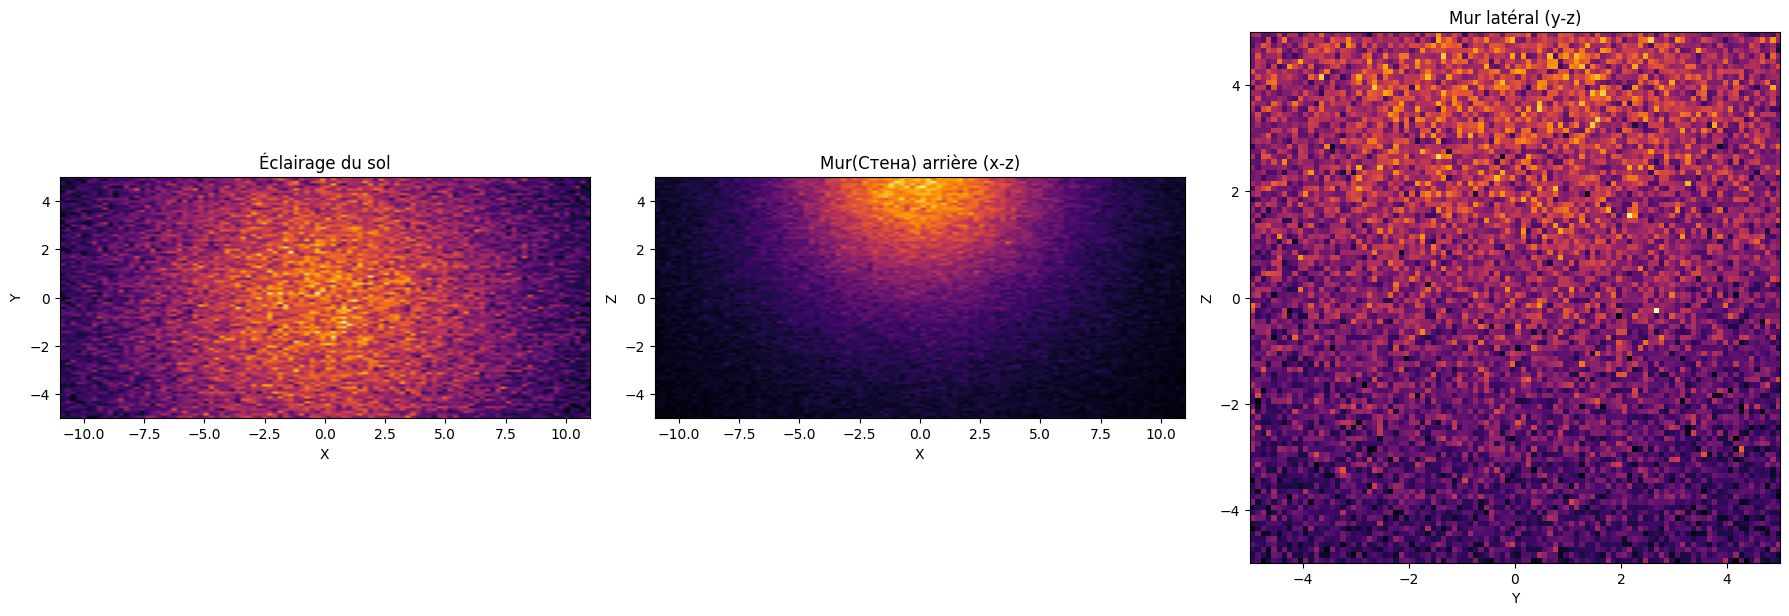

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions de la pièce
XMIN, XMAX = -11, 11
YMIN, YMAX = -5, 5
ZMIN, ZMAX = -5, 5

# Source(istocnik) de lumière (plafond, z = ZMAX)
LIGHT_XMIN, LIGHT_XMAX = -3, 3
LIGHT_YMIN, LIGHT_YMAX = -1, 1
Z_LIGHT = ZMAX - 0.01  # presque au plafond

# Paramètres de la grille
res = 100  # résolution de la grille par surface

# Grilles pour accumuler l'intensité lumineuse
floor_intensity = np.zeros((res, res))  # sol
wall_intensity = np.zeros((res, res))   # mur (стена) arrière (x-z)
sidewall_intensity = np.zeros((res, res))  # mur latéral (y-z)

# Fonction pour générer un vecteur aléatoire dans une sphère
def random_direction():
    theta = np.arccos(np.random.uniform(-1, 1))  # angle polaire
    phi = np.random.uniform(0, 2 * np.pi)        # angle azimutal
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return np.array([x, y, -abs(z)])  # forcer les rayons vers le bas

# Intersection avec une surface plane z = ZMIN (sol)
def intersect_plane_z(origin, direction, z_plane):
    # on denner les coordonner retourner par la fonction random_directiont a direction du parametre
    dz = direction[2]
    if abs(dz) < 1e-5:
        return None
    t = (z_plane - origin[2]) / dz
    if t <= 0:
        return None
    point = origin + t * direction
    return point

# Lancer les rayons/ le paramettre qui permet d'afficher beaucoup de point comme lumier
num_rays = 1_000_000

for _ in range(num_rays):
    # Tirage d'un point sur la source de lumière
    x0 = np.random.uniform(LIGHT_XMIN, LIGHT_XMAX)
    y0 = np.random.uniform(LIGHT_YMIN, LIGHT_YMAX)
    # z_light vient de de la formule Z_LiGHT = ZMAX - 0.01 qui presque au sol
    origin = np.array([x0, y0, Z_LIGHT])
    # la prend la fonction de random qui retourne les coordonner x y et -z
    direction = random_direction()

    # Intersection avec le sol (z = ZMIN)
    point = intersect_plane_z(origin, direction, ZMIN)
    if point is not None: # Pour verifier si y'a quelque chose dans le point sinon 
        x, y = point[0], point[1] # kes coordonner de x  et y
        if XMIN <= x <= XMAX and YMIN <= y <= YMAX:
            # on calcule xi et yi et recuper la partie entiere
            xi = int((x - XMIN) / (XMAX - XMIN) * res)
            yi = int((y - YMIN) / (YMAX - YMIN) * res)
            floor_intensity[yi, xi] += 1

    # Intersection avec mur arrière (y = YMIN)
    dy = direction[1] # on recuper le coordonne y qui vient de la functio direction de la random_direction
    if abs(dy) > 1e-5: # 0.00005
        t = (YMIN - origin[1]) / dy
        if t > 0:
            p = origin + t * direction
            x, z = p[0], p[2]
            if XMIN <= x <= XMAX and ZMIN <= z <= ZMAX:
                xi = int((x - XMIN) / (XMAX - XMIN) * res)
                zi = int((z - ZMIN) / (ZMAX - ZMIN) * res)
                wall_intensity[zi, xi] += 1

    # Intersection avec mur(Стена) latéral (x = XMIN)
    dx = direction[0]
    if abs(dx) > 1e-5:
        t = (XMIN - origin[0]) / dx
        if t > 0:
            p = origin + t * direction
            y, z = p[1], p[2]
            if YMIN <= y <= YMAX and ZMIN <= z <= ZMAX:
                yi = int((y - YMIN) / (YMAX - YMIN) * res)
                zi = int((z - ZMIN) / (ZMAX - ZMIN) * res)
                sidewall_intensity[zi, yi] += 1

# Normalisation
floor_intensity /= floor_intensity.max()
wall_intensity /= wall_intensity.max()
sidewall_intensity /= sidewall_intensity.max()

# Affichage
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(floor_intensity, extent=[XMIN, XMAX, YMIN, YMAX], origin='lower', cmap='inferno')
axs[0].set_title("Éclairage du sol")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

axs[1].imshow(wall_intensity, extent=[XMIN, XMAX, ZMIN, ZMAX], origin='lower', cmap='inferno')
axs[1].set_title("Mur(Стена) arrière (x-z)")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Z")

axs[2].imshow(sidewall_intensity, extent=[YMIN, YMAX, ZMIN, ZMAX], origin='lower', cmap='inferno')
axs[2].set_title("Mur latéral (y-z)")
axs[2].set_xlabel("Y")
axs[2].set_ylabel("Z")

plt.tight_layout()
plt.show()
